# Sample release
This notebook serves as a basic introduction to loading and viewing data
released in associaton with the publication titled Observation of gravitational waves from two neutron star–black hole coalescences.

The released data file can be read in using the PESummary or h5py libraries. For general instructions on how to manipulate the data file and/or read this data file with h5py, see the [PESummary docs](https://lscsoft.docs.ligo.org/pesummary)

First we import the key python modules

In [1]:
%matplotlib inline
import pesummary
from pesummary.io import read
print(pesummary.__version__)

0.12.0


As part of this sample release, we are releasing the posterior samples generated from 22 different analyses. The samples for each analysis is stored in the data file. This data file can be read in using the 'pesummary' read function

In [2]:
file_name = 'GW200115_042309_posterior_samples_v2.h5'
data = read(file_name)

2021-06-10  21:12:21 PESummary WARNING : Unable to install 'pycbc'. You will not be able to use some of the inbuilt functions.
2021-06-10  21:12:36 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2021-06-10  21:12:36 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz as default
2021-06-10  21:12:36 PESummary WARNING : Could not find minimum frequency in input file and one was not passed from the command line. Using 20.0Hz as default
2021-06-10  21:12:36 PESummary WARNING : Posterior samples for lambda_2 found in the posterior table and either unable to find samples for lambda_1 or all lambda_1 samples are 0. Applying NSBH fits to this system.
2021-06-10  21:12:36 PESummary WARNING : Could not find reference_frequency in input file. Using 20Hz as default
2021-06-10  21:12:36 PESummary WARNING : Could not find f_final in input file and on

2021-06-10  21:12:40 PESummary WARNING : Could not find minimum frequency in input file and one was not passed from the command line. Using 20.0Hz as default
2021-06-10  21:12:40 PESummary WARNING : Could not find reference_frequency in input file. Using 20Hz as default
2021-06-10  21:12:40 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2021-06-10  21:12:40 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz as default
2021-06-10  21:12:40 PESummary WARNING : Could not find minimum frequency in input file and one was not passed from the command line. Using 20.0Hz as default
2021-06-10  21:12:40 PESummary WARNING : Posterior samples for lambda_2 found in the posterior table and either unable to find samples for lambda_1 or all lambda_1 samples are 0. Applying NSBH fits to this system.
2021-06-10  21:12:40 PESummary WARNING : Could not fi

The posterior samples can be extracted through the `samples_dict` property. These posterior samples are stored in a custom table structure

In [3]:
samples_dict = data.samples_dict
posterior_samples = samples_dict['C01:Combined_PHM_high_spin']
parameters = list(posterior_samples.keys())
print(parameters)

['psi', 'mass_ratio', 'mass_2_source', 'spin_2y', 'chirp_mass', 'luminosity_distance', 'symmetric_mass_ratio', 'tilt_2', 'dec', 'iota', 'mass_1_source', 'phi_jl', 'mass_1', 'a_2', 'total_mass', 'chi_eff', 'radiated_energy', 'cos_iota', 'spin_1z', 'cos_tilt_2', 'ra', 'spin_1x', 'phi_12', 'chirp_mass_source', 'peak_luminosity', 'final_mass', 'a_1', 'spin_2z', 'phase', 'inverted_mass_ratio', 'phi_1', 'final_spin', 'comoving_distance', 'redshift', 'cos_tilt_1', 'cos_theta_jn', 'spin_1y', 'total_mass_source', 'chi_p', 'geocent_time', 'spin_2x', 'final_mass_source', 'phi_2', 'tilt_1', 'log_likelihood', 'theta_jn', 'mass_2']


## C01:Combined_PHM_high_spin analysis

'pesummary' allows for the user to easily make plots. As an example, we show the posterior distribution for 'mass_2_source' plotted as a KDE.

/Users/soichiro/envs/for_nsbh_demo/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


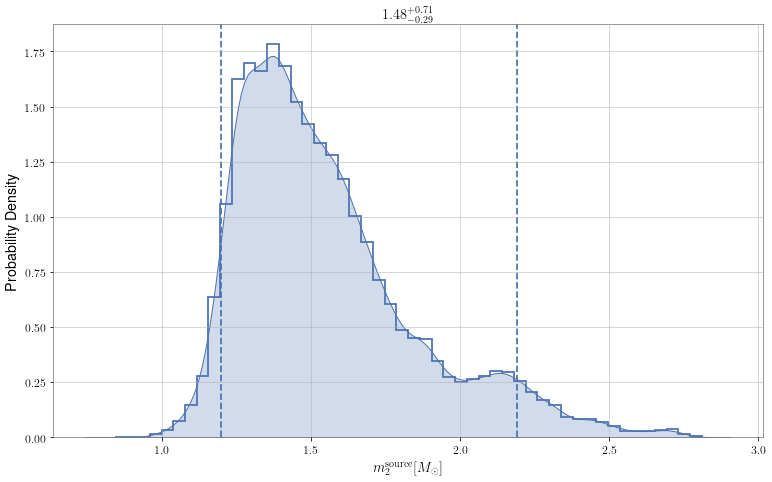

In [4]:
fig = posterior_samples.plot('mass_2_source', type='hist', kde=True)
fig.set_size_inches(12, 8)
fig.show()

We may also easily generate a spin disk, showing the most probable direction of the spin vectors

/Users/soichiro/envs/for_nsbh_demo/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


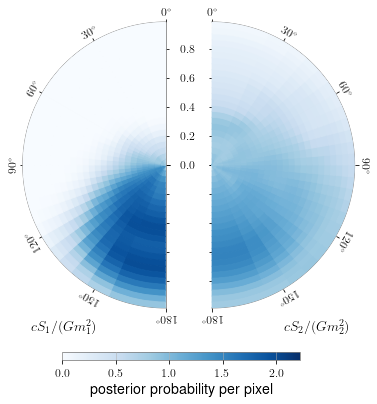

In [5]:
fig = posterior_samples.plot(type='spin_disk', colorbar=True, annotate=False, show_label=True, cmap='Blues')
fig.show()

Corner plots are very useful for spotting degeneracies between parameters. A corner plot can easily be generated using 'pesummary'

/Users/soichiro/envs/for_nsbh_demo/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


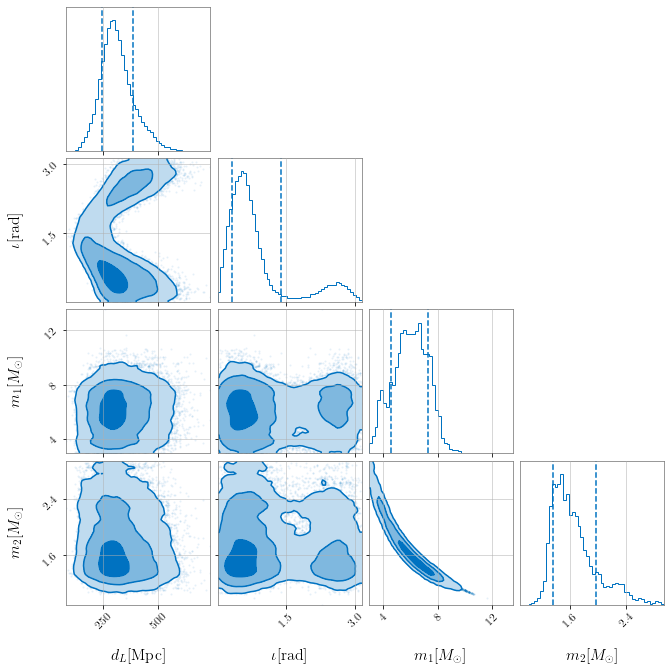

In [6]:
fig = posterior_samples.plot(type='corner', parameters=['mass_1', 'mass_2', 'luminosity_distance', 'iota'])
fig.show()

## Comparing multiple analyses

As the 'pesummary' file is able to store multiple analyses in a single file, we are able to easily generate a comparison plot showing the posterior distribution for 'mass_2_source' for each analysis

In [7]:
samples_dict_downsampled = dict(
    (key, samples_dict[key]) for key in
    ["C01:Combined_PHM_high_spin", "C01:PhenomXPHM_high_spin", "C01:SEOBNRv4PHM_high_spin"])
samples_dict_downsampled = pesummary.utils.samples_dict.MultiAnalysisSamplesDict(samples_dict_downsampled)

/Users/soichiro/envs/for_nsbh_demo/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


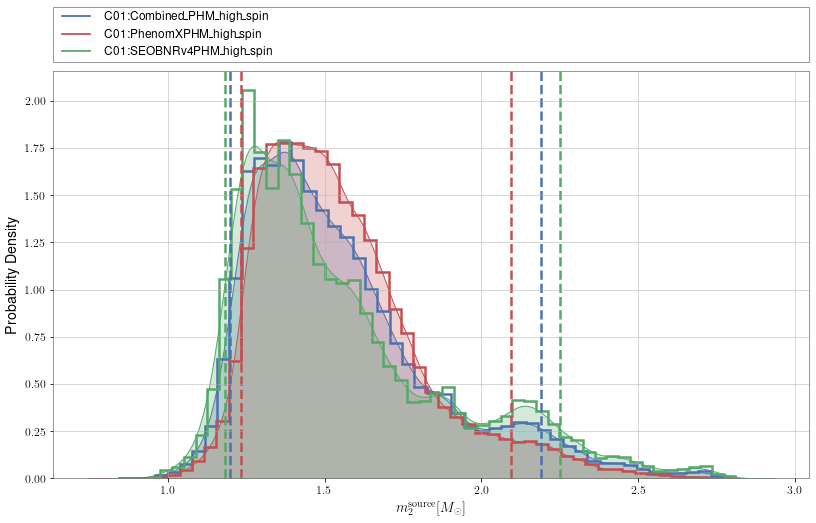

In [8]:
fig = samples_dict_downsampled.plot('mass_2_source', type='hist', kde=True)
fig.set_size_inches(12, 8)
fig.show()

A comparison histogram is not the only way to display this data. We may also generate a violin plot showing the posterior distribution for each analysis

/Users/soichiro/envs/for_nsbh_demo/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


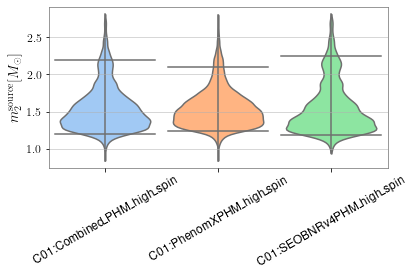

In [9]:
fig = samples_dict_downsampled.plot('mass_2_source', type='violin')
fig.show()

'pesummary' also allows for the user to generate a triangle plot with ease

/Users/soichiro/envs/for_nsbh_demo/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


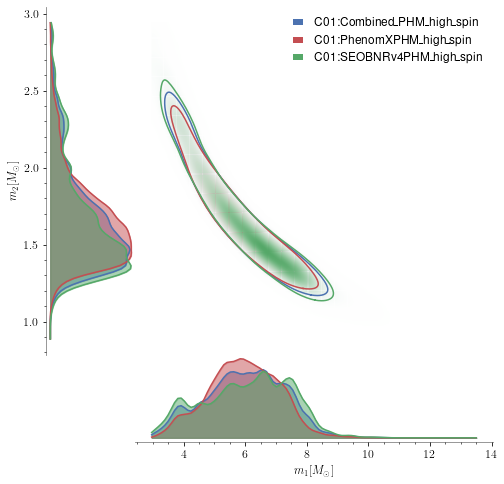

In [10]:
fig = samples_dict_downsampled.plot(['mass_1', 'mass_2'], type='reverse_triangle', grid=False)
fig[0].show()

It is also useful to see how degeneracies between certain parameters change for different analysis. This can be investigated by generating a comparison corner plot

/Users/soichiro/envs/for_nsbh_demo/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


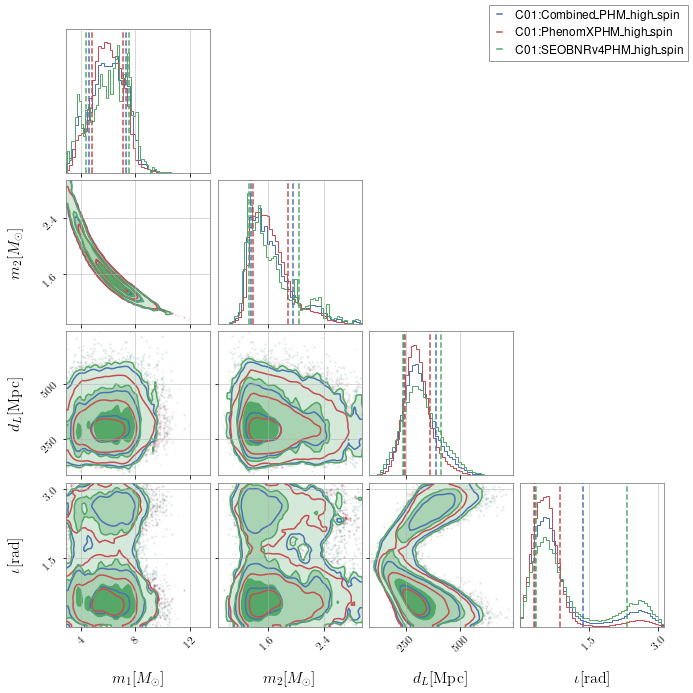

In [11]:
fig = samples_dict_downsampled.plot(type='corner', parameters=['mass_1', 'mass_2', 'luminosity_distance', 'iota'])
fig.show()

## PSD data

The 'pesummary' file also stores the PSD that was used for each analysis. This can be extracted and plotted

/Users/soichiro/envs/for_nsbh_demo/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


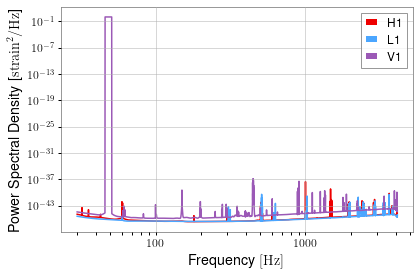

In [12]:
psd = data.psd['C01:Combined_PHM_high_spin']
fig = psd.plot(fmin=30)
fig.show()